In [1]:
!pip3 install datapane

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 445.9 kB/s eta 0:00:001m414.0 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 907.4 kB/s eta 0:00:0031m? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 942.5 kB/s eta 0:00:00MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 283.9 kB/s eta 0:00:00m eta 0:00:010:00:04
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.7/193.7 kB 288.3 kB/s eta 0:00:00 kB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 506.5/506.5 kB 230.4 kB/s eta 0:00:001m228.1 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.6/100.6 kB 178.2 kB/s eta 0:00:001m166.2 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.8/210.8 kB 211.2 kB/s eta 0:00:00 kB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 399.3 kB/s eta 0:00:001m432.6 kB/s eta 0:00:01
  Pre

# Login datapane

In [2]:
import datapane as dp

dp.login(token="")

Connected successfully to https://cloud.datapane.com as fernandoj.alvesfilho@gmail.com


'fernandoj.alvesfilho@gmail.com'

# barplot

In [3]:
import altair as alt

import datapane as dp

Uploading report and associated data - *please wait...*

Report successfully uploaded - view and share at <a href='https://cloud.datapane.com/reports/n3Zxa8k/my-example-report/' target='_blank'>here</a>.

Uploaded Report - view at https://cloud.datapane.com/reports/n3Zxa8k/my-example-report/

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/training.1600000.processed.noemoticon.csv', header=None, encoding='ISO-8859-1', names=['target', 'id', 'date', 'flag', 'user', 'text'])

count = df['target'].replace({0: 'Negative', 4: 'Positive'}).value_counts().reset_index()

count.columns = ['Sentimento', 'Contagem']

In [12]:
plot1= alt.Chart(count).mark_bar().encode(
    x=alt.X('Sentimento', title='Sentimento'),
    y=alt.Y('Contagem', title='Contagem'),
    color=alt.Color('Sentimento', scale=alt.Scale(range=['purple', 'black'])),
    tooltip=['Sentimento', 'Contagem']
).properties(
    width=500,
    height=500,
    title='Contagem de sentimentos'
).interactive()


# Word cloud

In [92]:
import os

if not os.path.exists("./content/"):
    os.mkdir('./content/')    

## Tweets positivos

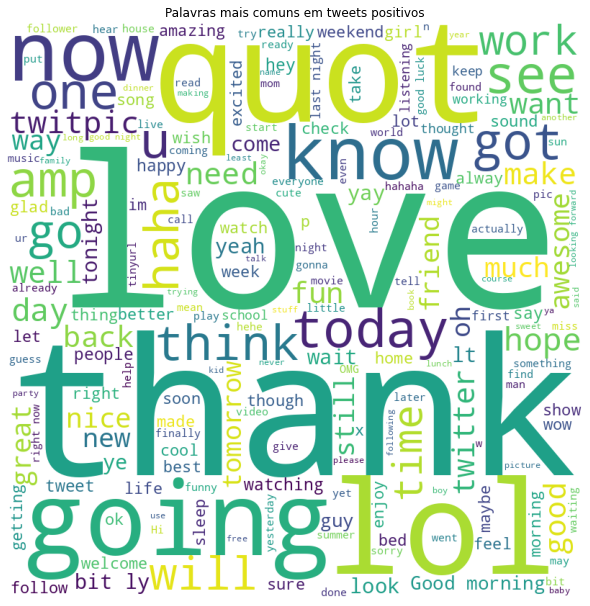

In [96]:
from wordcloud import WordCloud

pos_tweets = df[df['target'] == 4]
pos_text = pos_tweets['text'].values
pos_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(pos_text))
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(pos_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Palavras mais comuns em tweets positivos')
plt.savefig('./content/positive_words.png')

## Tweets negativos

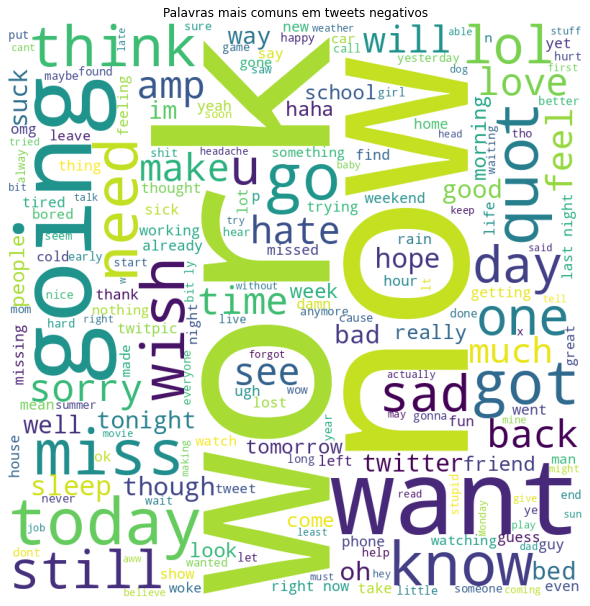

In [15]:
neg_tweets = df[df['target'] == 0]
neg_text = neg_tweets['text'].values
neg_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(neg_text))
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(neg_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Palavras mais comuns em tweets negativos')
plt.savefig('./content/negative_words.png')

# Distribuição

In [35]:
# tweets negativos
df2 = df[df['target'] == 0]
char_count = df2['text'].str.len()
negative_caracters = char_count
charCount = pd.DataFrame()

charCount['tweets count'] = char_count.value_counts().index
charCount['words count'] = char_count.value_counts().values


dist = alt.Chart(charCount).mark_bar().encode(
    x=alt.X('tweets count', title='quantidade de tweets'),
    y=alt.Y('words count', title='quantidade de caracters'),
    color=alt.Color('words count', scale=alt.Scale(range=['purple', 'black'])),
    tooltip=['tweets count', 'words count']
).properties(
    width=500,
    height=500,
    title='Distribuição de contagem de caracteres por tweet - sentimentos negativos'
).interactive()



# tweets positivos
df2 = df[df['target'] == 4]
char_count = df2['text'].str.len()
positive_caracters = char_count
charCount = pd.DataFrame()

charCount['tweets count'] = char_count.value_counts().index
charCount['words count'] = char_count.value_counts().values


dist2 = alt.Chart(charCount).mark_bar().encode(
    x=alt.X('tweets count', title='quantidade de tweets'),
    y=alt.Y('words count', title='quantidade de caracters'),
    color=alt.Color('words count', scale=alt.Scale(range=['orange', 'white'])),
    tooltip=['tweets count', 'words count']
).properties(
    width=500,
    height=500,
    title='Distribuição de contagem de caracteres por tweet - sentimentos positivos'
).interactive()

dist3= (dist2 + dist).properties(title='Sobreposição (Sentimentos negativos e positivos)')

dist3

alt.LayerChart(...)

# Heatmap

In [153]:
df.columns

Index(['target', 'id', 'date', 'flag', 'user', 'text'], dtype='object')

In [49]:
import calendar

df['date'] = df['date'].str.replace('PDT', '-0700')
df['date'] = pd.to_datetime(df['date'], format='%a %b %d %H:%M:%S %z %Y')

df.index = df.date
count = df.resample('D', on='date').size()

Text(0.5, 1.0, 'Heatmap of Tweets by Day of Week and Hour of Day')

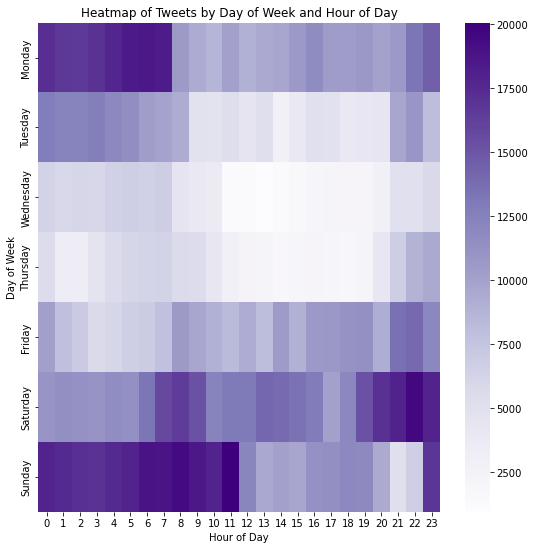

In [62]:
import calendar
import seaborn as sns
count = df.groupby([df.index.dayofweek, df.index.hour]).size().unstack()
count.index = count.index.map(lambda x: calendar.day_name[x])
plt.figure(figsize=(9,9))
sns.heatmap(count, cmap='Purples')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.title('Heatmap of Tweets by Day of Week and Hour of Day')

In [63]:


count.columns = ['0',  '1',  '2',  '3',  '4',  '5',  '6',  '7',  '8',  '9', '10', '11', '12', '13', '14', '15', '16',
            '17', '18', '19', '20', '21', '22', '23']


Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='date')

In [122]:
# Criando heatmap a partir da tabela "Count" 

def get_index(dia, hora):
    dias_da_semana = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    dia_index = dias_da_semana.index(dia)
    return dia_index * 24 + hora


# cria um dicionário com as colunas "Dias da semana" e "horário"
data = {"Day of week": [], "Hour of day": []}

# adiciona os dias da semana e horários no dicionário
dias_da_semana = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
horarios = range(0, 24)

for dia in dias_da_semana:
    for hora in horarios:
        data["Day of week"].append(dia)
        data["Hour of day"].append(hora)

# cria o dataframe a partir do dicionário
df_heatmap = pd.DataFrame(data)


for x in dias_da_semana:
    for y in range(0,24):
        df_heatmap.loc[get_index(x,y),'tweets'] = count[y][x]
        
        

heatmap = alt.Chart(df_heatmap).mark_rect().encode(
    x=alt.X('Hour of day:O', title='Horário'),
    y=alt.Y('Day of week:O', title='Dia da semana'),
    color='tweets:Q').properties(
    width=500,
    height=500,
    title='Quantidade de tweets durante o dia'
).interactive()


heatmap


alt.Chart(...)

In [118]:
?alt.X('Hour of day:O', title='Horário')

Object `alt.X('Hour of day:O', title='Horário')` not found.


# Upload report

In [36]:
positive_caracters

800000      44
800001      72
800002     137
800003     104
800004      47
          ... 
1599995     56
1599996     78
1599997     57
1599998     65
1599999     62
Name: text, Length: 800000, dtype: int64

In [131]:
df = pd.read_csv('data/training.1600000.processed.noemoticon.csv', header=None, encoding='ISO-8859-1', names=['target', 'id', 'date', 'flag', 'user', 'text'])


df2 = df[df['target'] == 0]
char_count = df2['text'].str.len()
negative_tweets = char_count.mean()




df2 = df[df['target'] == 4]
char_count = df2['text'].str.len()
positive_tweets = char_count.mean()

char_count = df['text'].str.len()
mean = char_count.mean()

In [132]:
dp.upload_report(
    [
        dp.Plot(plot1),
        dp.Plot(heatmap),
        dp.Group(
                dp.Media(file = './content/negative_words.png'),
                dp.Media(file = './content/positive_words.png'),
                
            columns=2,
        ),
        dp.Group(
                dp.Plot(dist),
                dp.Plot(dist2),
            columns= 2
        ),
                
        dp.Group(
            dp.BigNumber(heading="Média de caracteres em tweets negativos", value=negative_tweets),
            dp.BigNumber(heading="Média de caracteres", value=mean),
            dp.BigNumber(heading="Média de caracteres em tweets positivos", value=positive_tweets),
            columns=3,
        ),
        
        dp.Text("Dataset (reduzido)"),
        dp.DataTable(df[::100]),
    ],
    
    name="Sentiment analysis report"
)

Uploading report and associated data - *please wait...*

Uploading files


Report successfully uploaded - view and share at <a href='https://cloud.datapane.com/reports/v7Jar93/sentiment-analysis-report/' target='_blank'>here</a>.

Uploaded Report - view at https://cloud.datapane.com/reports/v7Jar93/sentiment-analysis-report/